# Dataset Description and Ensemble Models

### *Enhancing Sniffing Detection in IoT Home Wi-Fi Networks: An Ensemble Learning Approach with NMS*

Authors: *Hyo Jung Jin, FARSHAD RAHIMI GHASHGHAEI, NEBRASE ELMRABIT, YUSSUF AHMED, and MEHDI YOUSEFI*


## Introduction and Project Scope

Sniffing is one of the technologies widely used in the Network and Cyber Security fields. However, sniffing can also be used as a malicious technique that allows attackers to collect various information within a target network. A wireless network environment can be vulnerable to sniffing technology due to the broadcasting function of Wi-Fi. Wi-Fi devices can often be compromised, and critical information is leaked through sniffing attacks. Moreover, since sniffing is usually one of passive attacks, it is very challenging to detect sniffing activity in the network completely. This research proposes applying ensemble machine learning technology with sniffing detection methods using a Network Monitoring System (NMS) to detect sniffing behaviour in an Internet of Things (IoT) home Wi-Fi environment. After configuring a mock home Wi-Fi network, a small device using Linux assumes that a sniffing program is running and, in turn, acquires data through experiments. Finally, sniffing behaviour that is less sensitive to data changes and can effectively classify mixed data will be detected through ensemble machine learning.

## Sniffing Experiment and Collect Dataset
The project proposed the use of NMS and Ensemble Learning with Artificial Load,because the network monitoring system can detect anomalous traffic in real time and provides statistics and graphical representations. In addition, it is compatible with various IoT devices (Mikki, 2017, Stiawan et al., 2016). Moreover, in this research, Tcpdump and Wireshark are used as sniffing program because these programs are the most popular open-source sniffing programs in the world (Goyal, 2017). Thus, the 10 situations for the sniffing detections are considered in this experiment. 

<img src="pictures/proosed_architecture.png" width=1000>

NMS uses SNMP protocol to check the entire system’s status, including the CPU, memory, disk, and traffic. (Shafi and Al-Obaidi, 2013) Each Scanning factors has several channels, which are features of the dataset. 

<img src="pictures/NMS_history.png" width=1000>

The dataset consists of 31 attributes and 12,000 instances, as well as the class has 10 labels

In [35]:
import pandas as pd

# Load your data into a DataFrame (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('./Dataset/sniff_dataset.csv')
# Display information about the DataFrame
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPU_Total            12000 non-null  float64
 1   CPU_P1               12000 non-null  float64
 2   CPU_P2               12000 non-null  float64
 3   CPU_P3               12000 non-null  float64
 4   CPU_P4               12000 non-null  float64
 5   Disk_wrVolume        12000 non-null  float64
 6   Disk_wrSpeed         12000 non-null  float64
 7   Disk_wraccessVolume  12000 non-null  float64
 8   Disk_wraccessSpeed   12000 non-null  float64
 9   Load_1min            12000 non-null  float64
 10  Load_5min            12000 non-null  float64
 11  Load_15min           12000 non-null  float64
 12  Mem_Avail%           12000 non-null  float64
 13  Mem_Avail            12000 non-null  float64
 14  Mem_freePhysical%    12000 non-null  float64
 15  Mem_freePhysical    

<img src="pictures/Dataset_details.png" width=500>

## The Ensemble Learning Model for Sniffing Data Classification

The collected dataset is classified by four ensemble algorithms;
Decision Tree(DT), Random Forest(RF), XGBoost(XGB) and LightGBM(LGB)

<img src="pictures/Ensemble_Learning.png" width=800>

## Preprocessing
Preprocessing is an important stage to decrease errors. The first step is data cleaning

**Data Cleaning**
There are no missing data. However, there are two features: the unique value is 1 and standard deviations are 0. Two features are removed because they are meaningless. 

In [36]:
# Create lists to store information for each feature
features = []
missing_data = []
unique_values = []
average_values = []
std_dev_values = []

# Iterate through each column in the DataFrame
for column in df.columns:

    # Find missing data for the feature
    missing_count = int(df[column].isnull().sum())
    
    # Get unique values for the feature
    unique_count = int(df[column].nunique())
    
    # Calculate statistics for numerical features
    if pd.api.types.is_numeric_dtype(df[column]):
        average = df[column].mean()
        std_dev = df[column].std()
    else:
        minimum = maximum = None
        average = std_dev = None

    # Append information to lists
    features.append(column)
    missing_data.append(missing_count)
    unique_values.append(unique_count)
    average_values.append(average)
    std_dev_values.append(std_dev)

# Create a summary table using a dictionary
summary_data = {
    'Feature': features,
    'Missing Data': missing_data,
    'Unique Values': unique_values,
    'Average': average_values,
    'Standard Deviation': std_dev_values
}

summary_table = pd.DataFrame(summary_data)

# Display the summary table
print("Feature Summary Table:")
print(summary_table)

Feature Summary Table:
                Feature  Missing Data  Unique Values       Average  \
0             CPU_Total             0            224          9.16   
1                CPU_P1             0            268          7.68   
2                CPU_P2             0            420         10.34   
3                CPU_P3             0            476          9.40   
4                CPU_P4             0            415          9.06   
5         Disk_wrVolume             0           9573    2071047.17   
6          Disk_wrSpeed             0          10011      34537.12   
7   Disk_wraccessVolume             0           7927         27.72   
8    Disk_wraccessSpeed             0           3747          0.46   
9             Load_1min             0           1339          0.39   
10            Load_5min             0           1233          0.39   
11           Load_15min             0           1098          0.36   
12           Mem_Avail%             0            301         47.21 

Besides, many outliers are replaced with the maximum and minimum using the LOF algorithm.

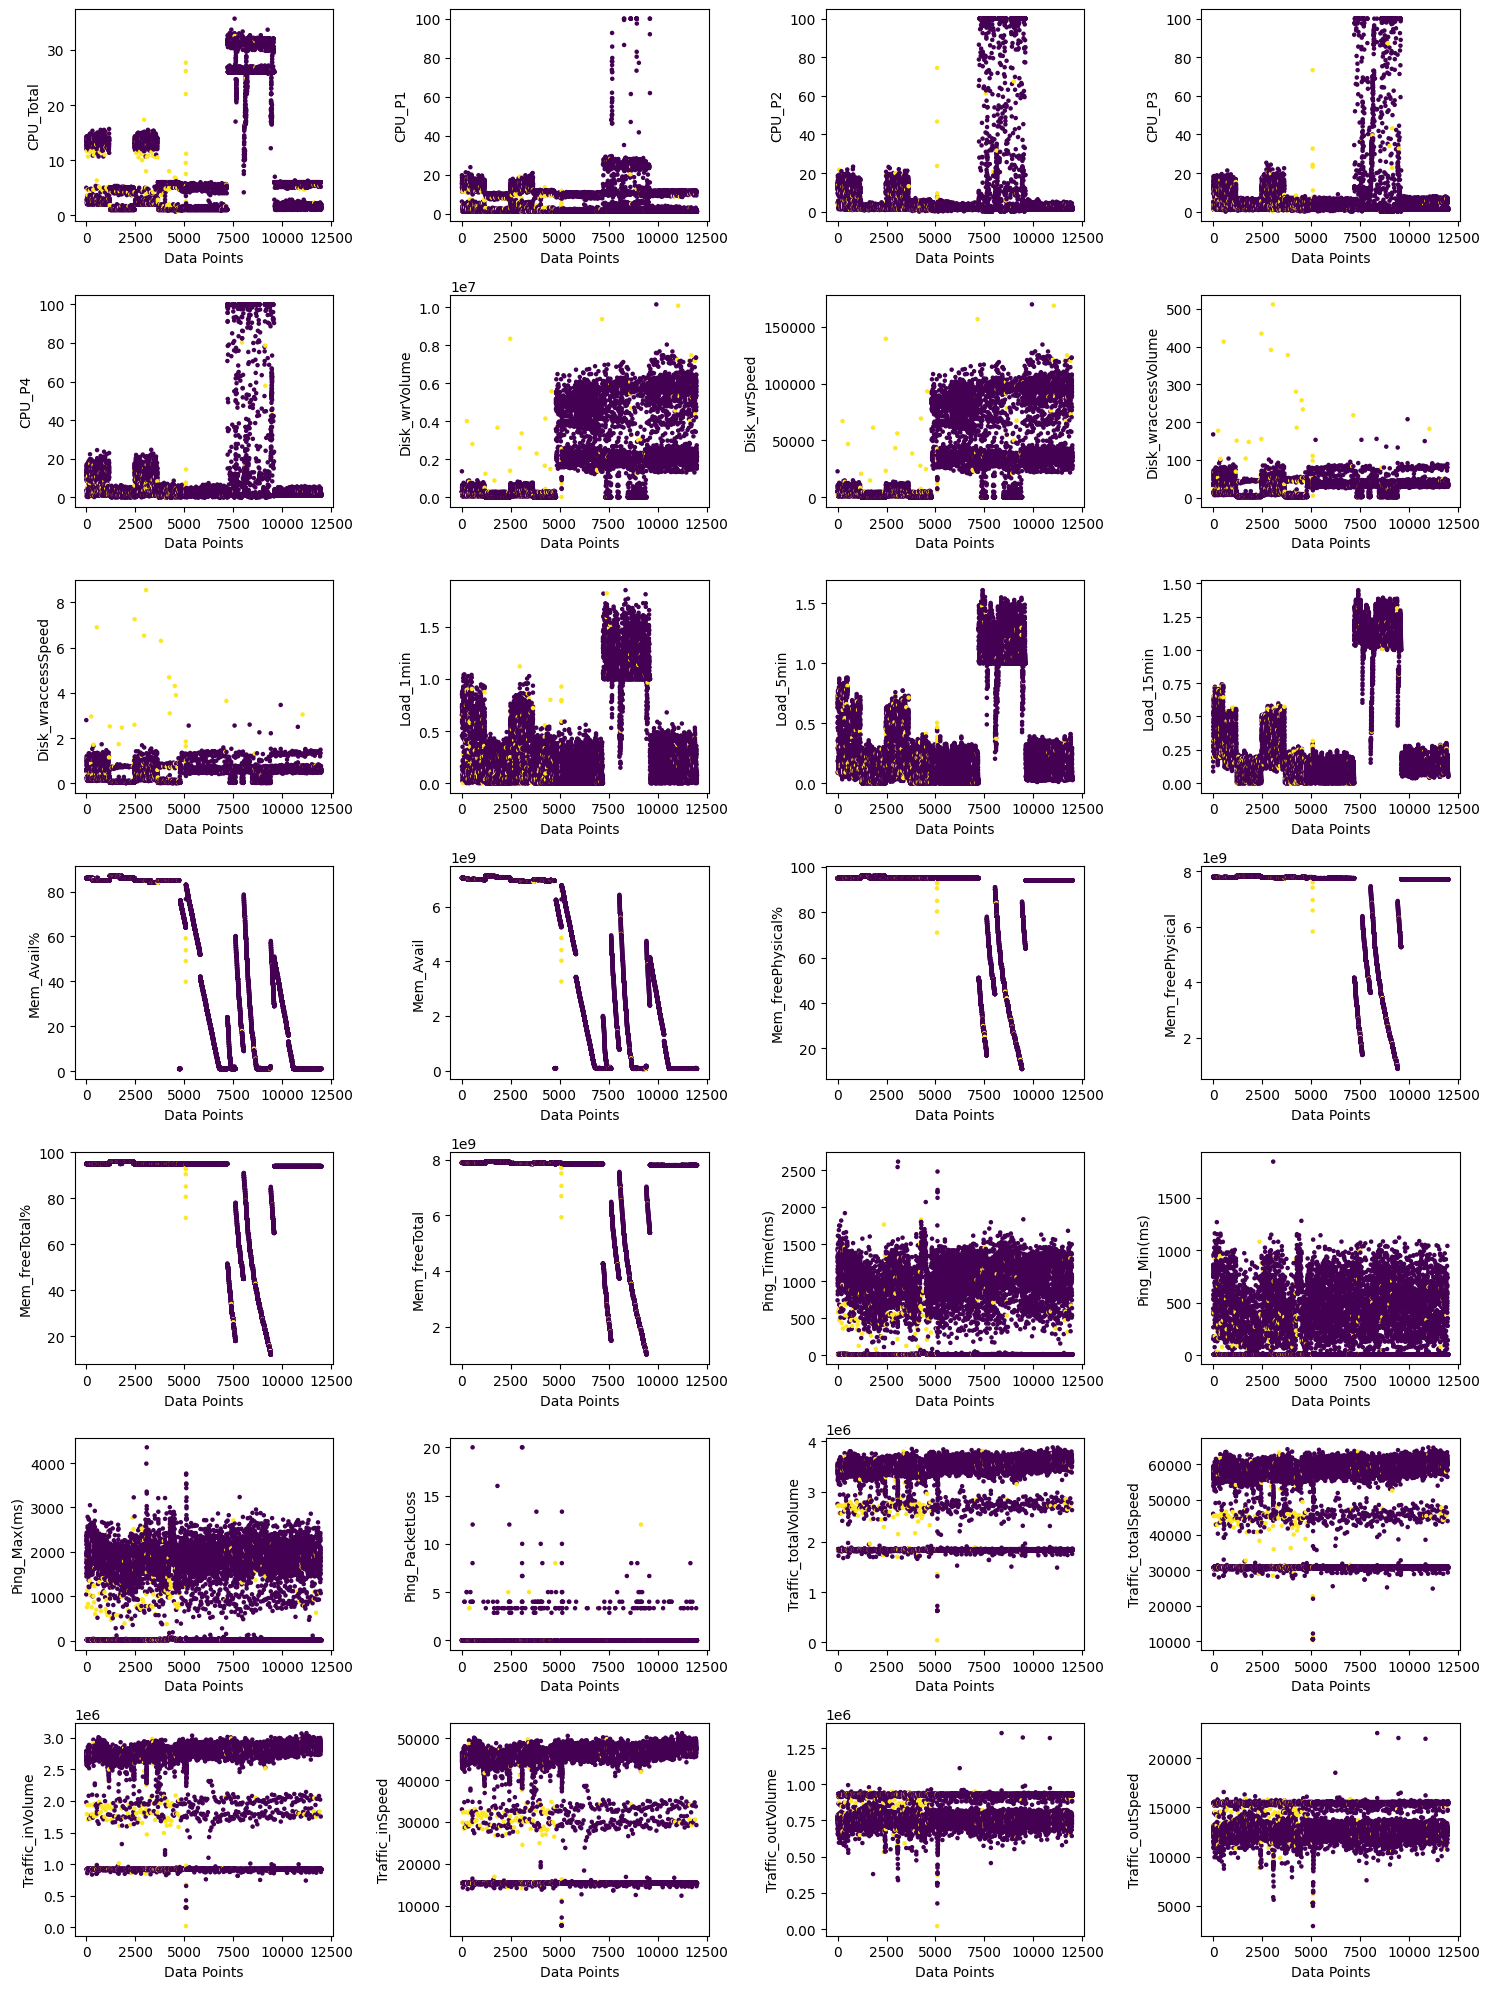

Modified data (replaced outliers) saved to ./Dataset/modified_28f.csv


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load your data (replace 'your_data.csv' with your actual file)
df = pd.read_csv('./Dataset/sniff_dataset_28f.csv')

# Exclude the 'Class' feature for LOF analysis
numeric_columns = df.drop(columns=['Class']).select_dtypes(include=['number'])

# Fit the LOF model for outlier detection
lof_model = LocalOutlierFactor(n_neighbors=4, contamination=0.03)  # You can adjust these parameters
outlier_scores = lof_model.fit_predict(numeric_columns)

# Create a boolean array indicating whether a data point is an outlier
outliers = outlier_scores == -1

# Print rows containing outliers
# print("Outliers using LOF:")
# print(df[outliers])

# Plot all numeric features in one graph
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(7, 4, i)  # Assuming you have 9 or fewer numeric features, adjust as needed
    plt.scatter(range(len(df)), df[col], c=outliers, cmap='viridis', s=5, label='Data Points')
    plt.xlabel('Data Points')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Impute outliers with the maximum or minimum inlier value for each feature
for col in numeric_columns.columns:
    inlier_max = np.max(df.loc[~outliers, col])
    inlier_min = np.min(df.loc[~outliers, col])

    # Replace outliers with the maximum inlier value if higher than the maximum
    df.loc[(outliers) & (df[col] > inlier_max), col] = inlier_max

    # Replace outliers with the minimum inlier value if lower than the minimum
    df.loc[(outliers) & (df[col] < inlier_min), col] = inlier_min

# Save the modified DataFrame to a CSV file
modified_file_path = './Dataset/modified_28f.csv'
df.to_csv(modified_file_path, index=False)

print(f"Modified data (replaced outliers) saved to {modified_file_path}")

**Correlation Analysis**
Next step is correlation analysis. Several features with a coefficient of 1.  may have multicollinearity, which can affect feature importance. So, An additional 18-feature dataset is created with perfect multicollinearity removed.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (replace 'your_data.csv' with your actual file)
df = pd.read_csv('./Dataset/modified_28f.csv')

# Exclude the 'Class' feature for the heatmap
numeric_columns = df.drop(columns=['Class']).select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(17, 15))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.8)

# Show the plot
plt.title('Feature Correlation Heatmap (Excluding Class)')
plt.show()

<img src="pictures/Correlation_analysis.png" width=800>

**Dataset Separate(8:2)** Train(9,600 instances) and Test (2,400 instances)

As the final step, the training and test datasets were separated 8:2. A total of 4 datasets are created: Train_28f, Test_28f, Train_18f, Test_18f

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file into a DataFrame
df = pd.read_csv('./Dataset/modified_18f.csv')

# Assume 'target_column' is the name of your target variable column
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save training set to CSV
training_set_path = './Dataset/train__18f.csv'
training_set = pd.concat([X_train, y_train], axis=1)
training_set.to_csv(training_set_path, index=False)

# Save test set to CSV
test_set_path = './Dataset/test__18f.csv'
test_set = pd.concat([X_test, y_test], axis=1)
test_set.to_csv(test_set_path, index=False)

## Ensemble Learning Model

**Single Tree Algorithm: Decision Tree**

Decision Tree acts as a tree algorithm to segment data using a tree-like structure. It provides an accurate solution because it undergoes segmentation starting from the root until it reaches the terminal leaf node. Decision Tree is used for data mining to classify large datasets. Informativity of attribute properties is an important factor that is evaluated through "information gains" and calculated as entropy of a dataset. Entropy acts as a measure of evaluating randomness or impurities present in the dataset, ranging from 0 to 1. A lower entropy value indicates an improvement in performance, and a higher value indicates an increase in impurities. If the property value of the target is represented by $c$, the classification entropy of the $S$ set for $c$ is determined by the following equation [30]:

$Entropy(S)=\sum \limits_{i=1}^{c}-p_i \log _2(p_i )$

The information gain, denoted as $Gain(S, A)$, is defined by
the following equation, where $V(A)$ represents the range of
attribute $A$, and $Sv$ is a subset of set $S$ equal to the value of
attribute $v$ [30]:

$Gain(S,A)=\sum \limits_{v \in V(A)} {\vert S_v \vert \over \vert S \vert}Entropy(S_v)$


Run Decision Tree Model

Mean Accuracy: 0.9976
Mean Precision: 0.9976
Mean Recall: 0.9976
Mean F1 Score: 0.9976
Training Time: 0.80 seconds

Test Metrics:
Accuracy: 0.9962
Precision: 0.9963
Recall: 0.9962
F1 Score: 0.9963


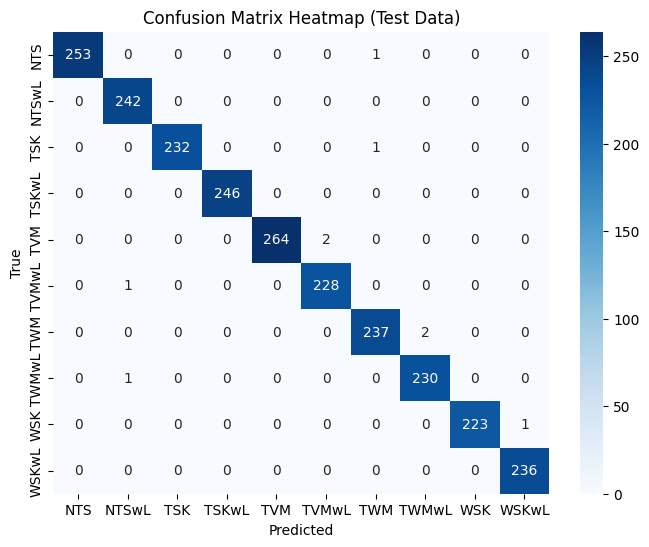

'decision_tree_graph.pdf'


(evince:1789): dconf-WARNING **: 22:58:57.402: failed to commit changes to dconf: Failed to execute child process “dbus-launch” (No such file or directory)


In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time


# Load training data
train_file_path = './Dataset/train_18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)

# Load testing data
test_file_path = './Dataset/test_18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

# Labels to drop from 'Class' column [sample]
# labels_to_drop = [NTS','TVM', 'TWM', 'WSK', 'TSK', 'NTSwL','TVMwL','TWMwL','WSKwL','TSKwL']  # Add the labels you want to drop
# Without Labels to drop 
labels_to_drop = [] 
# Binary classification test[NTS-Sniff, NTSwL-Sniff with Load]
# labels_to_drop = [ 'TWM', 'WSK', 'TSK', 'NTSwL', 'TVMwL', 'TWMwL','WSKwL','TSKwL']  # Add the labels you want to drop

# Drop rows with specified labels from 'Class' column
train_data = train_data[~train_data['Class'].isin(labels_to_drop)]
test_data = test_data[~test_data['Class'].isin(labels_to_drop)]

# Reset index if needed
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 18 features
features_to_drop = ['Class']
# Drop List for 7 features
# features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']
# Drop List for only ping feature
# features_to_drop = ['Class', 'CPU_Total', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Disk_wrVolume', 'Disk_wraccessVolume', 'Load_1min', 'Load_5min', 'Load_15min', 'Mem_Avail', 'Mem_freeTotal', 'Traffic_inVolume', 'Traffic_outVolume']


# Assume your target variable is named 'Class' and features are other columns
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

# If the 'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=42)


# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Record the start time
start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    decision_tree_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = decision_tree_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

# Calculate mean metrics over all folds
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

# Print mean metrics
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}")

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
decision_tree_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = decision_tree_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")

# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

# Plot ROC Curve and Calculate AUC for the test data
# n_classes = len(label_encoder.classes_)
# y_test_proba = decision_tree_model.predict_proba(X_test)  # Decision trees do not have probabilities, so this will be a pseudo-probability

# One-hot encode the true labels
# y_test_one_hot = pd.get_dummies(y_test_encoded, columns=label_encoder.classes_)

# Assuming y_test contains the true class labels
# unique_classes = y_test.unique()

# Plot ROC curve for each class
# plt.figure(figsize=(8, 6))
# for i in range(n_classes):
#     fpr, tpr, _ = roc_curve(y_test_one_hot.iloc[:, i], y_test_proba[:, i])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{unique_classes[i]} (AUC = {roc_auc:.2f})')

# plt.plot([0, 1], [0, 1], 'k--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Decision Tree (Test Data)')
# plt.legend(loc='lower right')
# plt.show()


# Plot Tree Graph using Graphviz
dot_data = export_graphviz(decision_tree_model, out_file=None, feature_names=X_train.columns,
                           class_names=label_encoder.classes_, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_graph", format="pdf", cleanup=True)
graph.view("decision_tree_graph")



# Display the feature importance
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': decision_tree_model.feature_importances_})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette='viridis', legend=False)
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance')
# plt.show()

# Permutation Importance
# result = permutation_importance(decision_tree_model, X_test, y_test_encoded, n_repeats=30, random_state=42)
# sorted_idx = result.importances_mean.argsort()

# Plot permutation importance
# plt.figure(figsize=(10, 6))
# plt.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx])
# plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
# plt.xlabel('Permutation Importance')
# plt.title('Permutation Importance for each Feature')
# plt.show()

# References

[1] Vojtech Havlicek, Antonio D. C´orcoles, Kristan Temme, Aram W. Harrow, Abhinav Kandala, Jerry M. Chow, and Jay M. Gambetta1, *Supervised learning with quantum enhanced feature spaces*, Nature 567, 209–212 (2019).

[2] Rebentrost, P., Mohseni, M. & Lloyd, S. *Quantum support vector machine for big data classification*, Physical
review letters 113, 130503 (2014).

[3] Lectures notes on Machine learning, Andrew Zisserman  (2015)

[4] Kristin P. Bennett and Colin Campbell, Support Vector Machines: Hype or Hallelujah?, SIGKDD Explorations 2, 1 (2000)